# What on earth is this Linear Regression?

Linear Regression predicts continuous target when there is a direct relationship between the target variable and one or multiple predictors. 

First things first, we import the required libraries. Here, Linear Regression has been implemented from scratch and no external libraries like `tensorflow`, `sklearn` or `pytorch` have been employed.

In [62]:
import pandas as pd                                 # for csv file I/O, data preprocessing etc.
import matplotlib.pyplot as plt                     # for data visualization   
import matplotlib as mpl                       
%matplotlib inline

Having imported the libraries, we load the *comma seperated values* file into a `pandas` DataFrame. We can also use NumPy's `loadtxt()` for reading a csv file. Refer [this](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) to check the usage guide.


In [63]:
data = pd.read_csv("data/numpydataset.csv")      # load the csv file as a DataFrame
data.head()                                     # displays the first 5 rows in the dataset

,Features,Targets
0,-10.000000,-12.494938
1,-9.959920,-16.144029
2,-9.919840,-16.175059
3,-9.879760,-23.393130
4,-9.839679,-12.531222


Well, how many observations does the dataset has? By using the `shape` property, we see that the dataset has 500 rows (observations) and 2 columns (variables).

In [64]:
data.shape

(500, 2)

We now [unpack](https://realpython.com/lessons/tuple-assignment-packing-unpacking/) the tuple obtained.

In [65]:
rows, cols = data.shape
samples = rows          # number of samples, here 500

The number of rows corresponds to the total number of data samples. 

# Mean Square Error

We define a method `MSE()` that will compute the loss incurred at each epoch. We aim to minimise the distance between the data and the line after each epoch. The higher the cost (or Error), the more the parameter values need to be changed in order to bring it down.</br>
The Error function is represented as $$ E = \frac{1}{n} \sum_{i=0}^{n} (y_i - \hat{y})^2 $$ where, </br> $ y_i $ is the actual value, </br> $ \hat{y} $ is the predicted value, </br> $ n $ is the total number of data points or samples. </br>

An *epoch* is a single iteration over a dataset of features.


In [66]:
def MSE(points, m, c):
    """Computes the Mean Square Error."""
    total_err = 0
    
    for i in range(samples):
        x = points.Features.iloc[i]
        y = points.Targets.iloc[i]
        total_err += (y - (m * x + c)) ** 2
    return total_err / samples

We invoke the function to calculate the initial loss when `m=0` and `c=0`. We can resort to using `m` and `w` interchangeably because they both refer to the *weight* or the *slope* of a straight line.

In [67]:
MSE(data, m=0, c=0)

182.94204589695937

We get a loss of around `183`. As I wrote earlier, our aim in Linear Regression is to minimise this value. Hence, we perform the elegant [Gradient Descent](https://developer.ibm.com/learningpaths/learning-path-machine-learning-for-developers/learn-regression-algorithms/?mhsrc=ibmsearch_a&mhq=regression) Algorithm. Extensively used in Machine Learning, this process involves finding the **local minimum** of a function. The sole idea behind this algorithm is akin to that of a blind, old man trying to go down a hill.</br>

# Intuition Behind Gradient Descent

Let's consider a scenario where a blind man, equipped only with a blind cane, is standing at a hill's summit at some point. If we wishes to descent, he should take miniature steps towards the bottom of the hill lest he stumble. He will extensively use the local neighbourhood information to plan his next step carefully. He can stop when he is very close to the bottom of the hill. This bottom, is analogous to the **global minimizers** of any function. If he feels a flat surface or a small valley with his cane, he might deduce that he reached the bottom, when in fact he didn't. Such a flat surface is analogous to stationary points of a function, that are definitely not the **global minimizers**.

# So What Is Gradient Descent?

Similarly, the basic storyline of Gradient Descent is to
* start at some point (also known as the initialization),
* somehow move down slowly (with small step-size) using the local neighborhood
information towards the minimizer/stationary point,
* and when very close to or at the minimizer/stationary point, we stop.

Mathematically, provided a certain learning rate $ \gamma $, take iterative steps (slowly) in the direction of $ -\nabla{E} $ (negative gradient) in order to minimise the error rate. Each iteration of gradient descent updates the `m` and the `c` (collectively denoted by $\theta$) according to,</br>
$$ \theta^{t+1} = \theta^{t} - \gamma \frac{\partial{E}(X, \theta)}{\partial{\theta}} $$ where $ \theta^t $ denotes the weights (slope) and the bias (intercept) at iteration $t$.
<!-- MORE EXPLANATION SHOULD BE PROVIDED --></br>

In [68]:
def gradient_descent(m_new, c_new, points, step_size):
    """The Gradient Descent Algorithm that updates both slope 
    and the intercept to minimise the Mean Square Error obtained
    at each epoch."""
    
    m_gradient = 0
    c_gradient = 0
    
    for i in range(samples):      
        x = points.iloc[i].Features  # Pandas index-based selection
        y = points.iloc[i].Targets   
        
       # obtaining the gradient w.r.t both m and c
        m_gradient += -(2/samples) * x * (y - (m_new * x + c_new))
        c_gradient += -(2/samples) * (y - (m_new * x + c_new))
        
    # updating m and b
    m = m_new - step_size * m_gradient
    c = c_new - step_size * c_gradient
    return m, c
    

Let's recapitulate. The process is simple; start with $m=0$ and $c=0$ and obtain new pairs of `m` and `c` at each epoch. Tentatively, we choose the step_size to be `0.001` and it can be readjusted if required.</br>It's now the time for action!

In [128]:
m, c = 0, 0
L = 0.001       # initial learning rate, can be adjusted later
epochs = 100    # we iterate over the same dataset 100 times

for epoch in range(1, epochs+1):
    m, c = gradient_descent(m, c, data, L)
    loss = MSE(data, m, c)
    print(f"Epoch {epoch}, m: {m}, c:{c}, Loss: {loss}")
#     if not(epoch % 10):
#         print(f"Epoch {epoch}, m: {m}, c:{c}")
print(m, c)

Epoch 1, m: 0.136583491906185, c:0.010312358814106729, Loss: 164.80508456949966
Epoch 2, m: 0.26402492243027265, c:0.02060409291058524, Loss: 149.00149960714555
Epoch 3, m: 0.3829362050996419, c:0.030875243538870792, Loss: 135.22943429119366
Epoch 4, m: 0.4938882957025642, c:0.041125851865899773, Loss: 123.2260882044345
Epoch 5, m: 0.5974139337480966, c:0.05135595897627469, Loss: 112.76266383116663
Epoch 6, m: 0.694010200429459, c:0.06156560587242887, Loss: 103.63996700446971
Epoch 7, m: 0.7841409053730308, c:0.07175483347479074, Loss: 95.68457660100785
Epoch 8, m: 0.8682388136330048, c:0.08192368262194788, Loss: 88.74550982980166
Epoch 9, m: 0.946707723624676, c:0.0920721940708107, Loss: 82.69131899125425
Epoch 10, m: 1.019924405973618, c:0.10220040849677581, Loss: 77.40756387953367
Epoch 11, m: 1.0882404125901861, c:0.11230836649388898, Loss: 72.7946112247259
Epoch 12, m: 1.1519837646556652, c:0.12239610857500792, Loss: 68.7657188598652
Epoch 13, m: 1.211460527624978, c:0.13246367517

Having obtained the final values for both `m` and `c`, we now perform visualization using `matplotlib`.</br>

# Data Visualization

In [123]:
plt.style.use('fivethirtyeight')  # setting the theme

In [126]:
mpl.rcParams['figure.figsize'] = (6, 4)    # setting the figure size
mpl.rcParams['axes.labelsize'] = 10        # setting the label size
mpl.rcParams['xtick.labelsize'] = 10       # setting the xtick's label size
mpl.rcParams['ytick.labelsize'] = 10       # settingthe ytick's label size

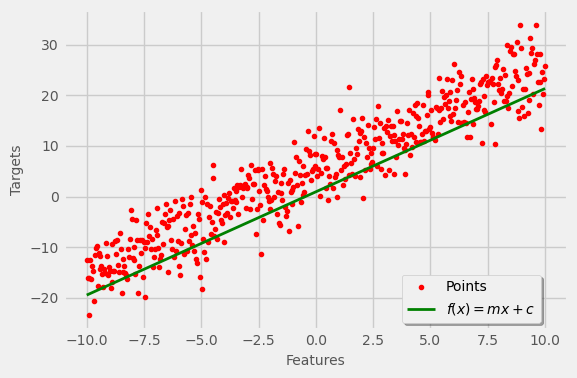

In [129]:
# Create just a figure and only one subplot
fig, ax = plt.subplots(tight_layout=True)

# scatter plot, actual values
ax.scatter(data.Features, 
           data.Targets, 
           marker=".",
           color="r",
           linewidths=1, 
           label="Points")

# line plot, predicted values
ax.plot(data.Features, 
        [m * x + c for x in data.Features],  
        "g-",
        linewidth=2,
        label="$ f(x) = mx+c $")

# legend
ax.legend(loc="lower right", 
          bbox_to_anchor=(.96, 0.0),
          shadow=True,
          fontsize=10)

# labels
ax.set_xlabel("Features")
ax.set_ylabel("Targets")

# display the final plot
plt.show()

We can clearly see the BAD line-fitting that followed.

Let's check our final loss value. Is it way lesser than the initial value i.e. `183`?
After 100 epochs, the final loss value is 35 (rounded up).


In [130]:
MSE(data, m, c)

34.815768029154874

An average loss of `35` indicates that our model is gradually getting better. We can tweak our model in order to reduce loss further.</br>
Our learning rate is `0.001` which is microscopic. The algorithm will take a LOT of time to converge i.e. reach the minima value for the error function $E$. Increasing the epoch is a bad option because it will result in an unnecessary increase in computation resources. Let's try adjusting the **learning rate**. How about `0.01`?

In [131]:
m, c = 0, 0
L = 0.01   # new learning rate
epochs = 100

for epoch in range(1, epochs+1):
    m, c = gradient_descent(m, c, data, L)
    loss = MSE(data, m, c)
    print(f"Epoch {epoch}, m: {m}, c:{c}, Loss: {loss}")
#     if not(epoch % 10):
#         print(f"Epoch {epoch}, m: {m}, c:{c}")
print(m, c)

Epoch 1, m: 1.3658349190618497, c:0.10312358814106728, Loss: 57.771463654789635
Epoch 2, m: 1.817463699913964, c:0.20418470451931323, Loss: 43.18968867478232
Epoch 3, m: 1.9667998699352043, c:0.3032245985699943, Loss: 40.73483420008382
Epoch 4, m: 2.0161795654332098, c:0.4002836947396617, Loss: 39.63997666358201
Epoch 5, m: 2.032507520858402, c:0.4954016089859357, Loss: 38.726544463098776
Epoch 6, m: 2.0379065441953887, c:0.5886171649472842, Loss: 37.864380213169895
Epoch 7, m: 2.0396917923929903, c:0.6799684097894059, Loss: 37.038008221408205
Epoch 8, m: 2.0402821049232593, c:0.7694926297346849, Loss: 36.24454102698065
Epoch 9, m: 2.040477298445292, c:0.8572263652810584, Loss: 35.48251486509766
Epoch 10, m: 2.040541841393459, c:0.9432054261165045, Loss: 34.75066709662237
Epoch 11, m: 2.040563183250068, c:1.0274649057352416, Loss: 34.04780073566182
Epoch 12, m: 2.0405702401766015, c:1.110039195761604, Loss: 33.372767908386045
Epoch 13, m: 2.0405725736292624, c:1.1909619999874392, Loss:

Let's observe the new loss value.

In [132]:
MSE(data, m, c)

17.469113719731904

Bingo! We were able to minimize the loss. Our **Gradient Descent** algorithm proved to be very efficient.
Let's quickly perform 2-D visualization.

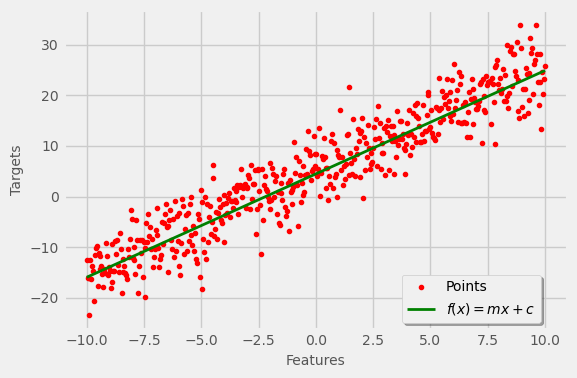

In [133]:
fig, ax = plt.subplots(tight_layout=True)

ax.scatter(data.Features, 
           data.Targets, 
           color="r",
           marker=".", 
           linewidths=1, 
           label="Points")

ax.plot(data.Features, 
        [m * x + c for x in data.Features],   
        'g-',
        linewidth=2,
        label="$ f(x) = mx+c $")

ax.legend(loc="lower right", 
          bbox_to_anchor=(.96, 0.0),
          shadow=True,
          fontsize=10)
ax.set_xlabel("Features")
ax.set_ylabel("Targets")

plt.show()

Much better!